[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AcousticOdometry/AO/blob/main/notebooks/plot_features.ipynb)


# Setup


In [1]:
COLAB_RUNTIME = False
GITHUB_TOKEN = None

## Install AO


In [2]:
%%capture
try:
    import colab
    COLAB_RUNTIME = True
    # Check CMake >= 3.21
    v_str, *_ = !cmake --version
    if 'command not found' in v_str:
        major, minor = (0, 0)
    else:
        major, minor, _ = (int(x) for x in v_str.split(' ')[-1].split('.'))
    if major < 3 or minor < 21:
        # https://cmake.org/download/
        %cd /tmp
        !wget https://github.com/Kitware/CMake/releases/download/v3.22.3/cmake-3.22.3-linux-x86_64.sh
        !sudo mkdir /opt/cmake
        !sudo sh ./cmake-3.22.3-linux-x86_64.sh --prefix=/opt/cmake \
            --skip-license
        %cd /content
        !update-alternatives --install /usr/local/bin/cmake cmake \
            /opt/cmake/bin/cmake 20 --force
except ImportError:
    pass

In [3]:
if COLAB_RUNTIME:
    from getpass import getpass
    if not GITHUB_TOKEN:
        GITHUB_TOKEN = getpass(
            "Personal access token\n"
            r"https://docs.github.com/en/authentication/keeping-your-account-"
            r"and-data-secure/creating-a-personal-access-token"+"\n"
            )
    %pip install git+https://$GITHUB_TOKEN@github.com/AcousticOdometry/AO
    try:
        import ao
    except ImportError:
        GITHUB_TOKEN = None
        raise
else:
    try:
        import ao
    except ImportError:
        raise ImportError(
            "Acoustic Odometry python extension is not installed. Check "
            r"https://github.com/AcousticOdometry/AO#readme"
            " for detailed instructions."
            )

## Other packages


In [4]:
import ao
import math
import numpy as np

from matplotlib import pyplot as plt

# Validation


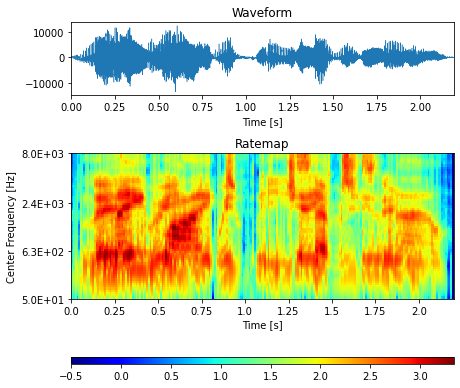

In [5]:
audio_url = (
    r"https://staffwww.dcs.shef.ac.uk/people/N.Ma/resources"
    r"/ratemap/t29_lwwj2n_m17_lgwe7s.wav"
    )
data, sample_rate = ao.io.wave_read(audio_url)
frame_length = 10  # [ms]
frame_samples = int(
    np.ceil(frame_length / 1000 * sample_rate)
    )  # samples per frame
fig, axs = plt.subplots(
    3, 1, figsize=(6.5, 5.5), gridspec_kw={'height_ratios': [0.5, 1, 0.05]}
    )
# Signal
ao.plot.signal(data, sample_rate, ax=axs[0])
axs[0].set_title('Waveform')
# Gammatonegram
frame_length = 10  # [ms]
frame_samples = math.ceil(frame_length / 1000 * sample_rate)
plot, _ = ao.plot.gammatonegram(
    data,
    sample_rate,
    frame_samples,
    num_features=64,
    low_Hz=50,
    high_Hz=8000,
    pcolormesh_kwargs={'cmap': 'jet', 'vmin': -0.5},
    ax=axs[1]
    )
axs[1].set_title('Ratemap')
fig.colorbar(plot, cax=axs[2], orientation="horizontal")
fig.tight_layout()

![Ratemap](https://staffwww.dcs.shef.ac.uk/people/N.Ma/resources/ratemap/ratemap.png)


# Primitive Experiment

Looks for `PRIMITIVE_EXPERIMENT` in the environment variables

In [6]:
if COLAB_RUNTIME:
    # Mount drive and find VAO_Primitive-Experiment
    # Otherwise prompt to add shortcut to drive from link
    # https://drive.google.com/drive/folders/1I6dq8gJpsrD3C14-WQKD4IFOnkiVuvFX
    raise NotImplementedError()
else:
    DATA_FOLDER = ao.dataset.utils.get_data_folder(env='PRIMITIVE_EXPERIMENT')


In [7]:
data, naming = ao.dataset.utils.list_data(DATA_FOLDER)

c:\Users\esdan\Desktop\AO\venv\lib\site-packages\ao\dataset\utils.py:124: UserWarning: Could not parse VAO_2022-03-08_17-11-21 from C:\Users\esdan\OneDrive - keio.jp\Thesis\Primitive Experiment\VAO_2022-03-08_17-11-21, item VAO_2022-03-08_17-11-21 should be composed by one `key` and one `value` separated by a unique underscore but 2 `_` were found.
  warn(str(e))
c:\Users\esdan\Desktop\AO\venv\lib\site-packages\ao\dataset\utils.py:124: UserWarning: Could not parse VAO_2022-03-08_17-12-37 from C:\Users\esdan\OneDrive - keio.jp\Thesis\Primitive Experiment\VAO_2022-03-08_17-12-37, item VAO_2022-03-08_17-12-37 should be composed by one `key` and one `value` separated by a unique underscore but 2 `_` were found.
  warn(str(e))


In [8]:
def plot_primitive_experiment(audio_file, ax=None):
    data, sample_rate = ao.io.wave_read(audio_file)
    frame_length = 10  # [ms]
    frame_samples = int(
        np.ceil(frame_length / 1000 * sample_rate)
        )  # samples per frame
    return ao.plot.gammatonegram(
        data,
        sample_rate,
        frame_samples,
        num_features=64,
        low_Hz=50,
        high_Hz=8000,
        ax=ax
        )

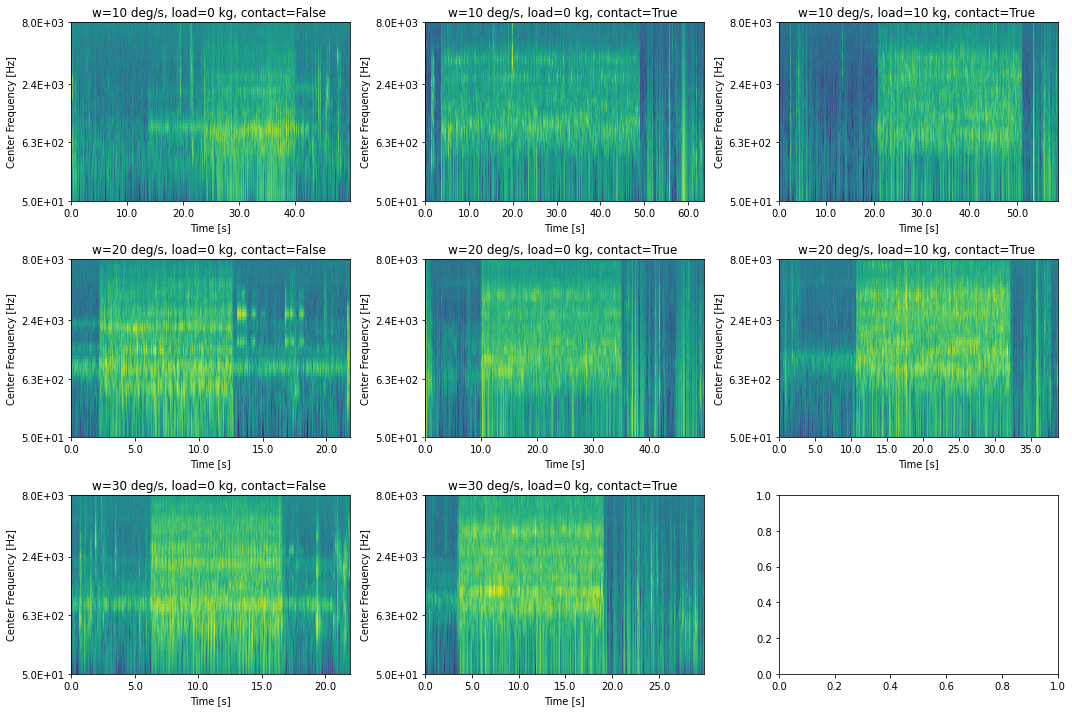

In [9]:
w_data = {}
for c in data.values():
    w_data[c['w']] = w_data.get(c['w'], []) + [c]
fig, axs = plt.subplots(
    len(w_data), max([len(v) for v in w_data.values()]), figsize=(15, 10)
    )
row = -1
last_w = None
for filename, content in data.items():
    if last_w != content['w']:
        row += 1
        col = 0
    else:
        col += 1
    last_w = content['w']
    plot, ax = plot_primitive_experiment(
        filename / 'audio0.wav', ax=axs[row, col]
        )
    ax.set_title(
        ', '.join(
            f"{k}={content[k]} {naming[k].get('unit', '')}"
            for k in naming.keys()
            )
        )
fig.tight_layout()
